In [3]:
#importing the neccessary libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#loading the data set
churn= pd.read_csv('Customer_Churn.csv')

In [5]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn.shape

(7043, 21)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [8]:
churn.drop(['customerID'], axis =1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


  ### DATA MODELING PREDICTION
    the following algorithm will be used for the model prediction
Logistics Regression
Decision Tree Classifer
Random Forest
XGBoost Classifier



In [9]:
pred_data = churn.copy(deep=True)

Trasnforming categorical data to numerical

In [10]:

#First, we encode all the categorical features (both the target feature and the descriptive features) into a set of numerical features.

from sklearn.preprocessing import LabelEncoder
for column in pred_data:
    if pred_data[column].dtype == np.number:
        continue
    pred_data[column] = LabelEncoder().fit_transform(churn[column])
#pred_data


In [11]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Exploring the correlation between the feature and target varibles

In [12]:
corr_value = pred_data.corr()
corr_value

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


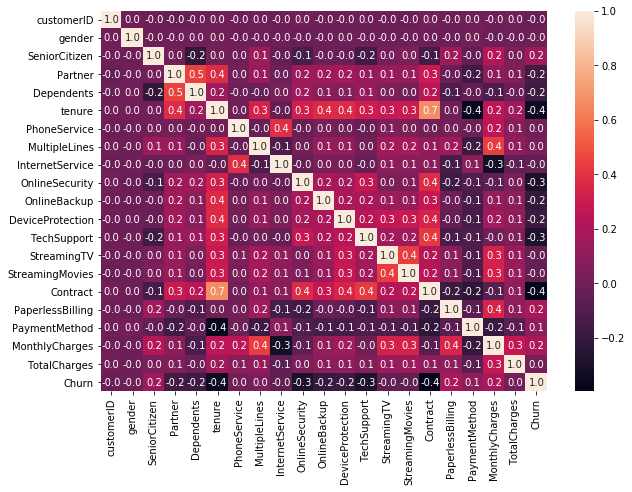

In [13]:
#heatmap
plt.figure(figsize =(10,7))
sns.heatmap(pred_data.corr(), annot=True, fmt ='.1f');

In [14]:
#features and target variable
x =pred_data.drop('Churn', axis =1)

In [15]:
y = pred_data['Churn']

In [16]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
#import the necessary libraries

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE



imbalance data handling wth SMOTE

In [20]:
x_res, y_res= SMOTE().fit_resample(x,y)
y_res.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

splitting the data set into train set and test set

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state = 42)

Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler() 

In [24]:
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.svm import SVC


In [26]:
# an instance of the lg
lg =LogisticRegression()

# Train the classifier
lg.fit(x_train, y_train)

LogisticRegression()

In [27]:
# predictions
y_predict = lg.predict(x_test)

In [28]:
accuracy_score(y_test, y_predict)

0.8147622427253371

In [36]:
precision_score(y_test, y_predict)

0.6842105263157895

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_predict)

0.6842105263157895

In [38]:
recall_score(y_test, y_predict)

0.5576407506702413

In [39]:
f1_score(y_test, y_predict)

0.6144756277695717

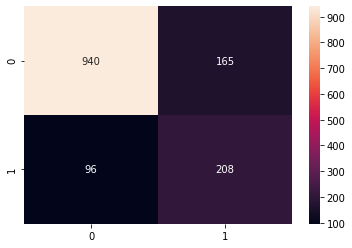

In [40]:
cs = confusion_matrix(y_predict,y_test)
sns.heatmap(cs, annot=True, fmt= '.0f');

SUPPORT VECTOR MACHINE

 Creating a Support Vector Classifier: SVC is SVM algorithm that is specifically used for classification

In [41]:
from sklearn import svm

svm = svm.SVC()

svm.fit(x_train, y_train)
y_predict1 = svm.predict(x_test)


In [42]:
accuracy_score(y_test, y_predict1)

0.7991483321504613

In [43]:
precision_score(y_test, y_predict1)

0.6691729323308271

In [44]:
f1_score(y_test, y_predict)

0.6144756277695717

# KNN CLASSIFIER

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier()

In [47]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_predict2 = knn.predict(x_test)

In [49]:
accuracy_score(y_test, y_predict2)

0.772888573456352

In [50]:
precision_score(y_test, y_predict2)

0.581039755351682

#### DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)



y_predict3 = dtc.predict(x_test)

In [53]:
accuracy_score(y_test, y_predict3)

0.7224982256919801

In [54]:
precision_score(y_test, y_predict3)

0.47643979057591623

#### RANDOM FOREST CLASSIFIER

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_predict4 = rfc.predict(x_test)


In [56]:
precision_score(y_test, y_predict4)

0.6548042704626335

In [57]:
accuracy_score(y_test, y_predict4)

0.7970191625266146

#### Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gbc =GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_predict5 =gbc.predict(x_test)

In [59]:
accuracy_score(y_test, y_predict5)

0.8090844570617459

In [60]:
precision_score(y_test, y_predict5)

0.6805555555555556

In [61]:
f1_score(y_test, y_predict5)

0.5930408472012102

#### The models accuracy scores

In [62]:
#accuracy_score_test, y_predict, y_predict1, y_predict2, y_predict3, y_predict4, y_predict5

final_accuracy_score = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DCT', 'RFC', 'GBC'],
    'Accuracy_Score': [
        accuracy_score(y_test, y_predict),
        accuracy_score(y_test, y_predict1),
        accuracy_score(y_test, y_predict2),
        accuracy_score(y_test, y_predict3),
        accuracy_score(y_test, y_predict4),
        accuracy_score(y_test, y_predict5)
    ]
})


In [63]:
final_accuracy_score

,Models,Accuracy_Score
0,LR,0.814762
1,SVC,0.799148
2,KNN,0.772889
3,DCT,0.722498
4,RFC,0.797019
5,GBC,0.809084


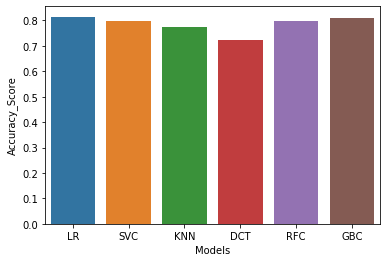

In [64]:
#visualizing accuracy score
sns.barplot(final_accuracy_score['Models'], final_accuracy_score['Accuracy_Score'])

#### The models precision scores

In [65]:
final_precision_score = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DCT', 'RFC', 'GBC'],
    'Precision_Score': [
        precision_score(y_test, y_predict),
        precision_score(y_test, y_predict1),
        precision_score(y_test, y_predict2),
        precision_score(y_test, y_predict3),
        precision_score(y_test, y_predict4),
        precision_score(y_test, y_predict5)
    ]
})


In [66]:
final_precision_score

,Models,Precision_Score
0,LR,0.684211
1,SVC,0.669173
2,KNN,0.581040
3,DCT,0.476440
4,RFC,0.654804
5,GBC,0.680556


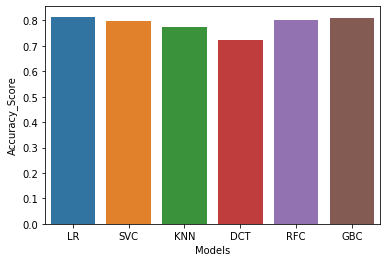

In [62]:
#visualizing precision score
sns.barplot(final_accuracy_score['Models'], final_accuracy_score['Accuracy_Score'])

In [69]:
final_f1_score = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DCT', 'RFC', 'GBC'],
    'F1_Score': [
        f1_score(y_test, y_predict),
        f1_score(y_test, y_predict1),
        f1_score(y_test, y_predict2),
        f1_score(y_test, y_predict3),
        f1_score(y_test, y_predict4),
        f1_score(y_test, y_predict5)
    ]
})

final_f1_score

,Models,F1_Score
0,LR,0.614476
1,SVC,0.557121
2,KNN,0.542857
3,DCT,0.482119
4,RFC,0.562691
5,GBC,0.593041


In [70]:
final_recall_score = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DCT', 'RFC', 'GBC'],
    'Recall_Score': [
        recall_score(y_test, y_predict),
        recall_score(y_test, y_predict1),
        recall_score(y_test, y_predict2),
        recall_score(y_test, y_predict3),
        recall_score(y_test, y_predict4),
        recall_score(y_test, y_predict5)
    ]
})
final_recall_score

,Models,Recall_Score
0,LR,0.557641
1,SVC,0.477212
2,KNN,0.509383
3,DCT,0.487936
4,RFC,0.493298
5,GBC,0.525469
